In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
df = pd.read_csv('../pythonhomework6csv.csv')
df

,Unnamed: 0,year,month,day,RMM1,RMM2,phase,amplitude,final_values
0,0,1974,6,1,1.634470,1.203040,5,2.029480,Final_value:__OLR_&_NCEP_winds
1,1,1974,6,2,1.602890,1.015120,5,1.897290,Final_value:__OLR_&_NCEP_winds
2,2,1974,6,3,1.516250,1.085510,5,1.864760,Final_value:__OLR_&_NCEP_winds
3,3,1974,6,4,1.509810,1.035730,5,1.830920,Final_value:__OLR_&_NCEP_winds
4,4,1974,6,5,1.559060,1.305180,5,2.033260,Final_value:__OLR_&_NCEP_winds
...,...,...,...,...,...,...,...,...,...
17460,17460,2022,3,21,1.058647,-1.269627,3,1.653084,Prelim_value:_OLR_&_ACCESS_wind
17461,17461,2022,3,22,1.039455,-0.817596,4,1.322471,Prelim_value:_OLR_&_ACCESS_wind
17462,17462,2022,3,23,0.981937,-0.722337,4,1.219004,Prelim_value:_OLR_&_ACCESS_wind
17463,17463,2022,3,24,0.900615,-0.630580,4,1.099426,Prelim_value:_OLR_&_ACCESS_wind


In [11]:
##  求月平均
def hebingday(df,startyear,endyear):
    dftemp1=df.loc[df['year']==startyear].groupby(['month']).mean()
    dftemp1=dftemp1.reset_index()
    for y_i in np.arange(startyear+1,endyear+1,1):
        dftemp=df.loc[df['year']==y_i].groupby(['month']).mean()
        dftemp=dftemp.reset_index()
        dftemp1=pd.concat([dftemp1,dftemp])
    return dftemp1

In [13]:
df=hebingday(df,2015,2020)
df

,month,Unnamed: 0,year,day,RMM1,RMM2,phase,amplitude
0,1,14839.0,2015.0,16.0,0.240301,1.143472,6.451613,1.576486
1,2,14868.5,2015.0,14.5,-0.402643,0.628380,6.642857,0.894538
2,3,14898.0,2015.0,16.0,-0.615814,0.858320,5.161290,2.404735
3,4,14928.5,2015.0,15.5,0.494468,-0.745644,3.733333,1.042428
4,5,14959.0,2015.0,16.0,-0.067212,0.217109,4.483871,0.671891
...,...,...,...,...,...,...,...,...
7,8,16878.0,2020.0,16.0,-0.443908,-0.230977,4.548387,1.551213
8,9,16908.5,2020.0,15.5,0.800916,-0.101859,4.100000,1.002244
9,10,16939.0,2020.0,16.0,1.314870,0.828408,5.354839,1.773082
10,11,16969.5,2020.0,15.5,-0.327610,-0.293515,4.533333,1.132318


In [44]:
#读取2015-2020的数据
amp = df.loc[df['year'].isin(np.arange(2015, 2021, 1))]['amplitude']
phase = df.loc[df['year'].isin(np.arange(2015, 2021, 1))]['phase']
time = pd.date_range('20150101', '20201231', freq='1m')

In [45]:
amp

0     1.576486
1     0.894538
2     2.404735
3     1.042428
4     0.671891
        ...   
7     1.551213
8     1.002244
9     1.773082
10    1.132318
11    0.826904
Name: amplitude, Length: 72, dtype: float64

In [46]:
time

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

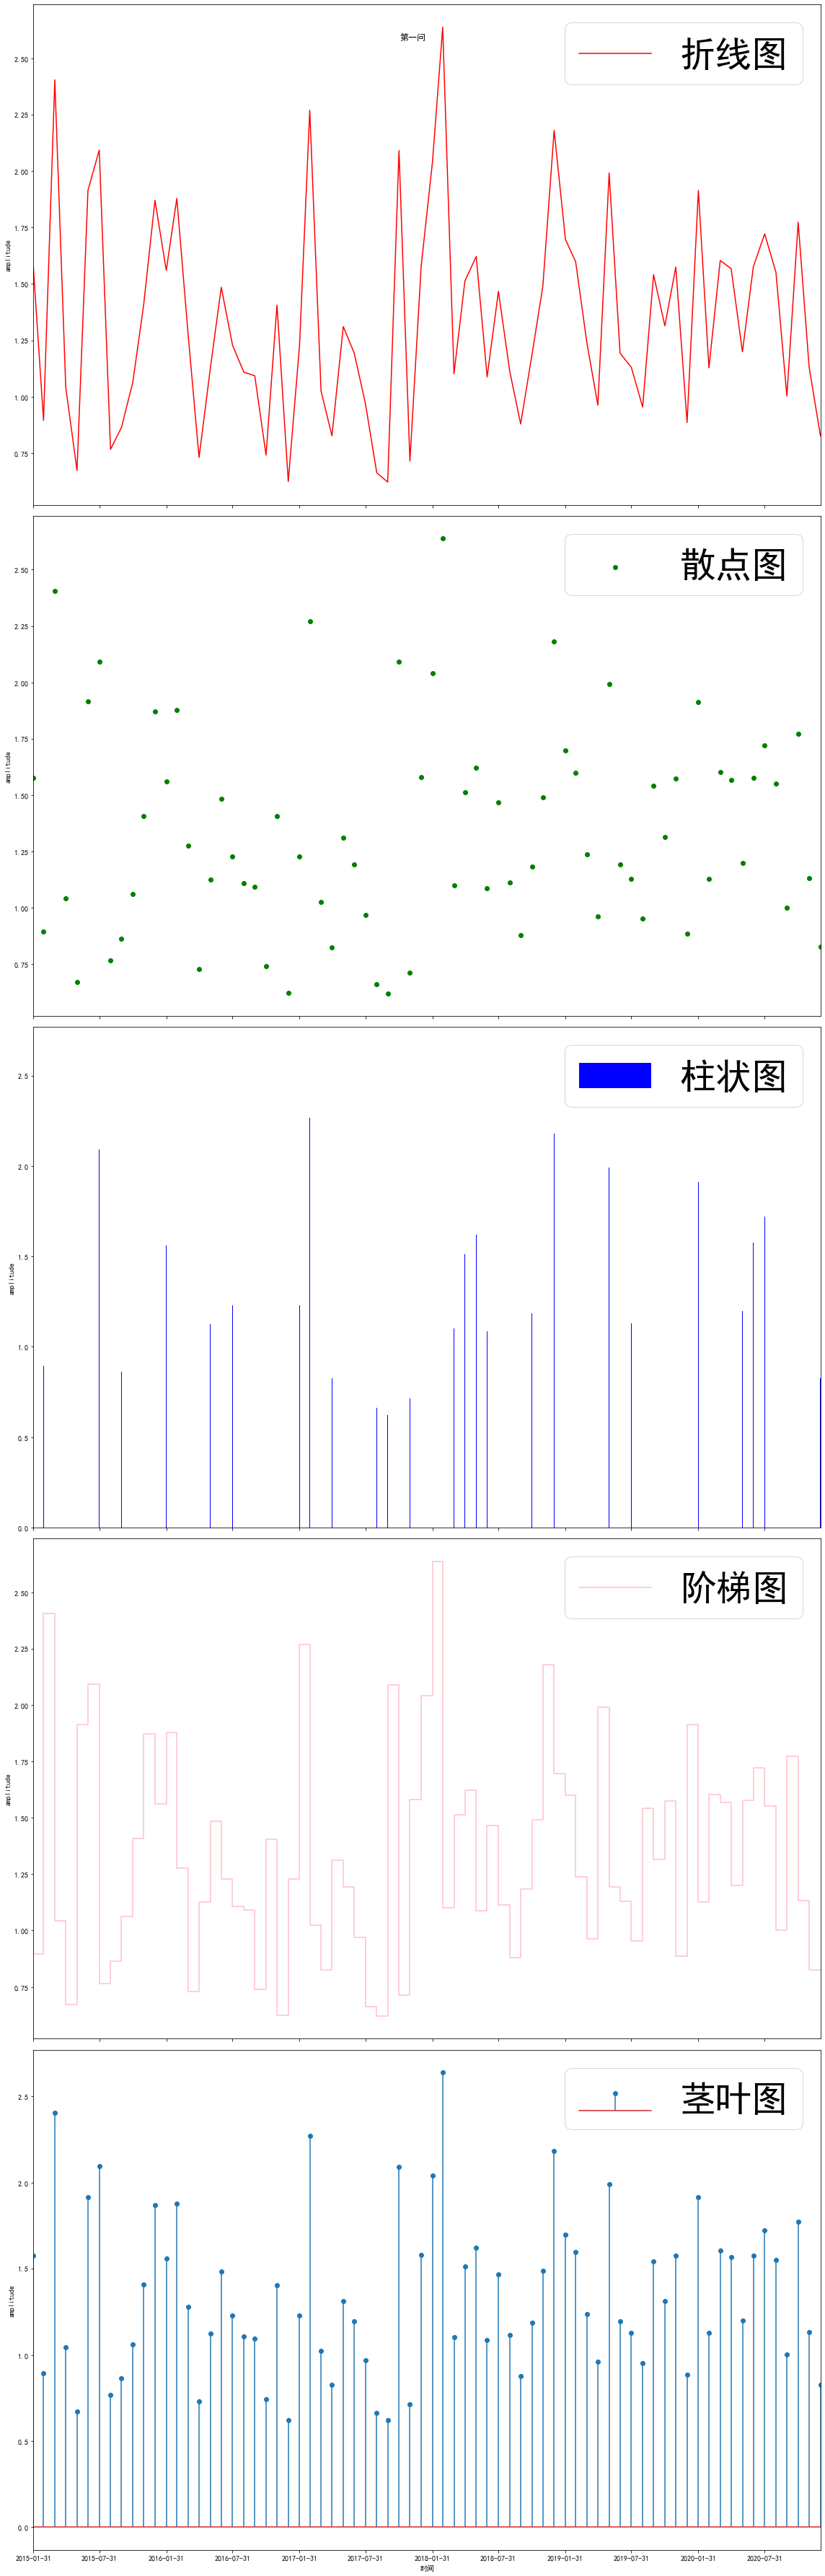

In [48]:
fig = plt.figure(figsize=(16, 50))
fig.suptitle('第一问')
#分配子图
ax1,ax2,ax3,ax4,ax5 = fig.subplots(5, 1,sharex='col')

# 折线
ax1.plot(time, amp,color='r',label='折线图')
ax1.legend(loc='upper right',fontsize=50)
ax1.yaxis.set_label_text('amplitude')
# 散点
ax2.scatter(time, amp,color='g',label='散点图')
ax2.legend(loc='upper right',fontsize=50)
ax2.yaxis.set_label_text('amplitude')
# 柱状
ax3.bar(time, amp,color='b',label='柱状图')
ax3.legend(loc='upper right',fontsize=50)
ax3.yaxis.set_label_text('amplitude')
# 阶梯
ax4.step(time, amp,color='pink',label='阶梯图')
ax4.legend(loc='upper right',fontsize=50)
ax4.yaxis.set_label_text('amplitude')
# 茎叶
ax5.stem(time, amp,label='茎叶图')
ax5.legend(loc='upper right',fontsize=50)
ax5.set_xticks(pd.date_range('20150101',periods=13,freq='6m'))
ax5.xaxis.set_label_text('时间')
ax5.yaxis.set_label_text('amplitude')
plt.xlim(time[0],time[-1])
plt.tight_layout()
plt.savefig('../pythonhome8.png')

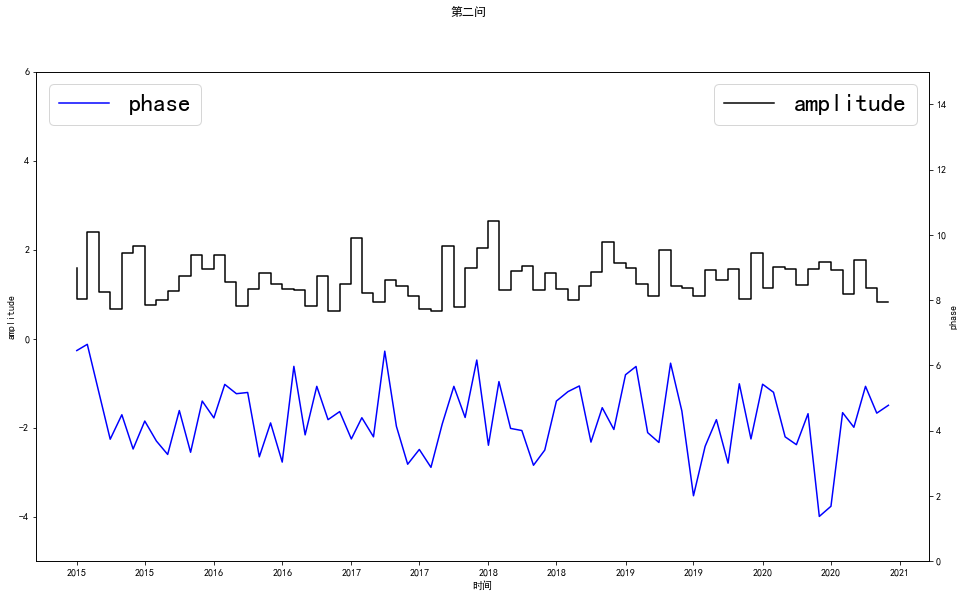

In [49]:
fig=plt.figure(figsize=(16,9))
fig.suptitle('第二问')
ax=fig.subplots(1, 1)
ax.step(time,amp,color='black',label='amplitude')
ax.yaxis.set_label_text('amplitude')
ax.xaxis.set_label_text('时间')
ax.legend(loc='best',fontsize=25)
ax.set_ylim(-5,6)
ax1=ax.twinx()
ax1.plot(time,phase,color='b',label='phase')
ax1.set_xticks(pd.date_range('20150101',periods=13,freq='6m'))
ax1.yaxis.set_label_text('phase')
ax1.legend(loc='upper left',fontsize=25)
ax1.set_ylim(0,15)
plt.savefig('../pythonhome82.png')

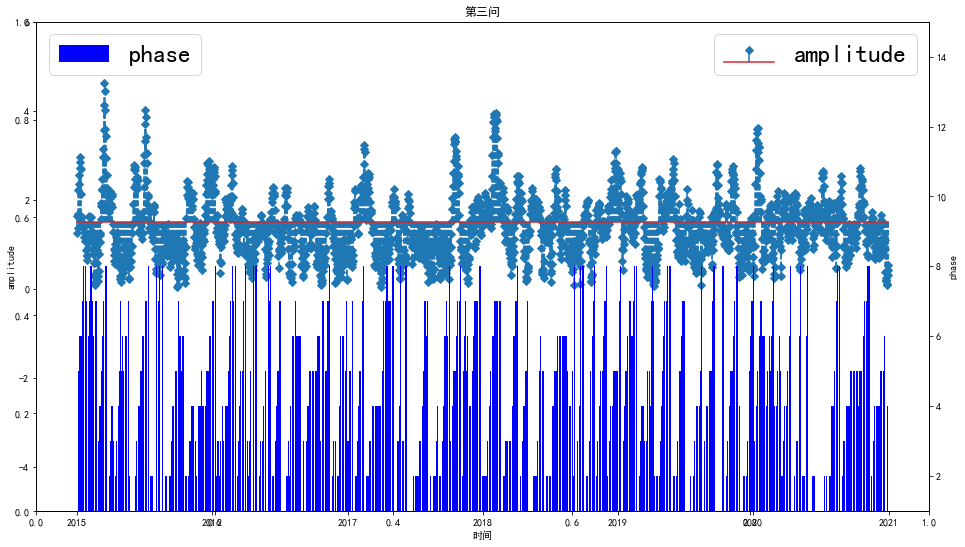

In [38]:
fig=plt.figure(figsize=(16,9))
fig.title('第三问')
ax=fig.subplots(1, 1)
ax.stem(time,amp,linefmt='--',markerfmt='D',bottom=1.5,label='amplitude')
ax.yaxis.set_label_text('amplitude')
ax.xaxis.set_label_text('时间')
ax.legend(loc='best',fontsize=25)
ax.set_ylim(-5,6)
ax1=ax.twinx()
ax1.bar(time,phase,color='b',label='phase')
ax1.yaxis.set_label_text('phase')
ax1.legend(loc='upper left',fontsize=25)
ax1.set_ylim(1,15)
plt.savefig('../pythonhome83.png')